In [1]:
# source code: https://github.com/ashishpatel26/Market-Basket-Analysis/blob/master/Market%20Basket%20Analysis%20Using%20apyori%20%20package.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori # installed in anaconda cmd before importing
import math

In [2]:
# set hyperparameters
MIN_SUPPORT = 0.0045
MIN_CONFIDENCE = 0.2
MIN_LIFT = 3
MIN_LENGTH = 2
MAX_SIZE = 10

In [3]:
def visualize_res(association_res):
    print("There are {} Relation derived.".format(len(association_res)))
    print('')
    # print the frequent itemsets
    for i in range(len(association_res)):
        print(association_res[i][0])
    print('')
    # print all information regarding the rules generated
    for item in association_res:
        # first index of the inner list
        # Contains base item and add item
        pair = item[0]
        pair_lst = [x for x in pair]
        print("Rule: " + pair_lst[0] + " -> " + pair_lst[1])

        # second index of the inner list
        print("Support: " + str(item[1]))

        # third index of the list located at 0th
        # of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [4]:
# import dataset function
def import_dataset(dataset_dir):
    data = pd.read_csv(dataset_dir, header=None)
    display(data.head())
    print(data.shape)
    return data

In [5]:
# remove nan in list
def remove_nan(my_list):
    return [[val for val in sub_list if not isinstance(val, float) or not math.isnan(val)] for sub_list in my_list]

In [6]:
# convert all data to string in a list
def to_string(my_2d_list):
    return [[str(x) for x in sublist] for sublist in my_2d_list]

In [7]:
# function for preprocessing the dataset
def preprocess(dataset):
    # convert dataset to list version for passing into the apriori algorithm
    records = dataset.values.tolist()

    # drop all nan values
    records = remove_nan(records)

    # convert all data to string type
    records = to_string(records)
    return records

In [8]:
# import dataset
store_data = import_dataset('Data/store_data.csv')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [9]:
# preprocessing dataset
store_data_lst = preprocess(store_data)

In [10]:
%%time
# apply the apriori model
# tune the min_support parameter
MIN_SUPPORT = 0.005

# fix the number of records for experimenting
association_rules = apriori(store_data_lst[:5000], min_support=MIN_SUPPORT, 
                            min_confidence=MIN_CONFIDENCE, 
                            min_lift=MIN_LIFT, 
                            min_length=MIN_LENGTH)
association_results = list(association_rules)

Wall time: 168 ms


In [11]:
visualize_res(association_results)

There are 31 Relation derived.

frozenset({'burgers', 'almonds'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'parmesan cheese', 'frozen vegetables'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'cake', 'burgers', 'milk'})
frozenset({'french fries', 'burgers', 'milk'})
frozenset({'frozen vegetables', 'chocolate', 'olive oil'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'spaghetti', 'ground beef', 'cooking oil'})
frozenset({'spaghetti', 'frozen smoothie', 'frozen vegetables'})
frozenset({'milk', 'frozen vegetables', 'olive oil'})
frozenset({'milk', 'frozen vegetables', 'tomatoes'})
frozenset({'mineral water', 'frozen vegetables', 'olive oil'})
frozenset({'mineral water', 'frozen vegetables', 'shrimp'})
frozenset({'spaghetti', 'frozen vegetables', 'olive oil'})
frozenset({'spaghetti', 'frozen vegetables', 'shrimp'})
frozenset({'spaghetti', 'frozen vegetables', 't

In [12]:
# try dataset 2
# import dataset
groceries_data = import_dataset('Data/groceries.csv')

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,frankfurter,sausage,liver loaf,ham,chicken,beef,citrus fruit,tropical fruit,root vegetables,other vegetables,...,roll products,flour,pasta,margarine,specialty fat,sugar,soups,skin care,hygiene articles,candles
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9835, 32)


In [13]:
# preprocessing dataset
groceries_data_lst = preprocess(groceries_data)

In [14]:
%%time
# apply the apriori model
# tune the min_support parameter
MIN_SUPPORT = 0.006

# fix the number of records for experimenting
association_rules = apriori(groceries_data_lst[:5000], min_support=MIN_SUPPORT, 
                            min_confidence=MIN_CONFIDENCE, 
                            min_lift=MIN_LIFT, 
                            min_length=MIN_LENGTH)
association_results = list(association_rules)

Wall time: 239 ms


In [15]:
visualize_res(association_results)

There are 48 Relation derived.

frozenset({'whipped/sour cream', 'baking powder'})
frozenset({'whipped/sour cream', 'berries'})
frozenset({'grapes', 'tropical fruit'})
frozenset({'sausage', 'sliced cheese'})
frozenset({'root vegetables', 'beef', 'other vegetables'})
frozenset({'whole milk', 'root vegetables', 'beef'})
frozenset({'whole milk', 'butter', 'domestic eggs'})
frozenset({'butter', 'tropical fruit', 'other vegetables'})
frozenset({'butter', 'whipped/sour cream', 'other vegetables'})
frozenset({'whole milk', 'butter', 'other vegetables'})
frozenset({'whole milk', 'butter', 'whipped/sour cream'})
frozenset({'citrus fruit', 'root vegetables', 'other vegetables'})
frozenset({'citrus fruit', 'tropical fruit', 'other vegetables'})
frozenset({'citrus fruit', 'root vegetables', 'tropical fruit'})
frozenset({'yogurt', 'other vegetables', 'cream cheese'})
frozenset({'yogurt', 'whole milk', 'cream cheese'})
frozenset({'whole milk', 'whipped/sour cream', 'curd'})
frozenset({'yogurt', 'who

In [16]:
# try dataset 3
# import
game_data = import_dataset('Data/games_sales_dataset.csv')

,0,1,2,3,4,5,6,7,8,9,10,11
0,God of War,The Last of Us,Read Dead Redemption,Minecraft,Grand Theft Auto V,Left 4 Dead,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto V,The Last of Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,God of War,Assassin's Creed 2,Read Dead Redemption,Left 4 Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Left 4 Dead,Assassin's Creed 2,Super Mario World,The Last of Us,Read Dead Redemption,The Elder Scrolls V: Skyrim,NaN,NaN,NaN,NaN,NaN,NaN
4,Left 4 Dead,Minecraft,The Last of Us,Dark Souls,Read Dead Redemption,Resident Evil 4,NaN,NaN,NaN,NaN,NaN,NaN


(12526, 12)


In [17]:
# preprocessing dataset
game_data_lst = preprocess(game_data)

In [18]:
%%time
# apply the apriori model
# tune the min_support parameter
MIN_SUPPORT = 0.005

# fix the number of records for experimenting
association_rules = apriori(game_data_lst[:5000], min_support=MIN_SUPPORT, 
                            min_confidence=MIN_CONFIDENCE, 
                            min_lift=MIN_LIFT, 
                            min_length=MIN_LENGTH)
association_results = list(association_rules)

Wall time: 15.7 s


In [19]:
# visualize association results
visualize_res(association_results)

There are 0 Relation derived.




In [20]:
# try dataset 4 
# import dataset
breakfast_data = import_dataset('Data/breakfast_data.csv')

,0,1,2,3,4,5,6,7,8,9,10
0,Yougurt,Ghee,Coffee Powder,Cheese,Tea Powder,Lassi,Butter,Sweet,Sugar,Milk,Panner
1,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,NaN,NaN,NaN,NaN,NaN
2,Ghee,Coffee Powder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lassi,Tea Powder,Butter,Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,NaN,NaN,NaN,NaN,NaN


(12526, 11)


In [21]:
# preprocessing dataset
breakfast_data_lst = preprocess(breakfast_data)

In [22]:
%%time
# apply the apriori model
# Tune the min_support to get useful results
MIN_SUPPORT = 0.005

# reduce the number of records to reduce training time
association_rules = apriori(breakfast_data_lst[:5000], min_support=MIN_SUPPORT, 
                            min_confidence=MIN_CONFIDENCE, 
                            min_lift=MIN_LIFT, 
                            min_length=MIN_LENGTH)
association_results = list(association_rules)

Wall time: 15.4 s


In [23]:
# visualize association results
visualize_res(association_results)

There are 0 Relation derived.




In [24]:
import itertools
# brute force method for doing ar mining
def brute_force_market_basket_analysis(transactions, min_support, min_confidence):
    """
    Brute force method for market basket analysis
    :param transactions: 2D list representing the transactions
    :param min_support: minimum support threshold
    :param min_confidence: minimum confidence threshold
    :return: list of association rules
    """
    # Calculate the unique items in the transactions
    unique_items = set()
    for transaction in transactions:
        for item in transaction:
            unique_items.add(item)
    
    # Generate all possible itemsets
    itemsets = []
    for k in range(1, len(unique_items) + 1):
        itemsets += list(itertools.combinations(unique_items, k))
    
    # Calculate the support for each itemset
    itemset_support = {}
    for itemset in itemsets:
        count = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                count += 1
        support = count / len(transactions)
        if support >= min_support:
            itemset_support[itemset] = support
    
    # Generate all possible association rules
    candidate_rules = []
    for itemset in itemset_support.keys():
        if len(itemset) >= 2:
            for k in range(1, len(itemset)):
                for antecedent in itertools.combinations(itemset, k):
                    consequent = tuple(set(itemset) - set(antecedent))
                    candidate_rules.append((antecedent, consequent))
    
    # Calculate the confidence for each association rule
    association_rules = []
    for rule in candidate_rules:
        antecedent, consequent = rule
        support_antecedent = itemset_support[antecedent]
        support_rule = itemset_support[itemset]
        confidence = support_rule / support_antecedent
        if confidence >= min_confidence:
            association_rules.append((antecedent, consequent, confidence))
    
    return association_rules

In [25]:
test_dataset = [['eggs', 'bacon', 'yogurt'],
 ['bread', 'milk', 'cheese'],
 ['bacon', 'lettuce', 'tomato'],
 ['bread', 'peanut butter', 'jelly'],
 ['eggs', 'bacon', 'bread', 'milk'],
 ['yogurt', 'berries', 'granola'],
 ['cheese', 'crackers', 'pepperoni'],
 ['lettuce', 'chicken', 'avocado'],
 ['coffee', 'sugar', 'cream'],
 ['eggs', 'bread', 'bacon', 'lettuce']]

In [26]:
%%time
# experiment with the 4 datasets above (reduced the size by factor of 1000)
# store_data
MIN_SUPPORT = 0.005
brute_force_market_basket_analysis(test_dataset, MIN_SUPPORT, MIN_CONFIDENCE)

Wall time: 2.59 s


[(('cheese',), ('bread',), 0.5),
 (('bread',), ('cheese',), 0.25),
 (('cheese',), ('crackers',), 0.5),
 (('crackers',), ('cheese',), 1.0),
 (('cheese',), ('pepperoni',), 0.5),
 (('pepperoni',), ('cheese',), 1.0),
 (('cheese',), ('milk',), 0.5),
 (('milk',), ('cheese',), 0.5),
 (('bread',), ('jelly',), 0.25),
 (('jelly',), ('bread',), 1.0),
 (('bread',), ('bacon',), 0.25),
 (('bacon',), ('bread',), 0.25),
 (('bread',), ('peanut butter',), 0.25),
 (('peanut butter',), ('bread',), 1.0),
 (('bread',), ('eggs',), 0.25),
 (('eggs',), ('bread',), 0.33333333333333337),
 (('bread',), ('milk',), 0.25),
 (('milk',), ('bread',), 0.5),
 (('bread',), ('lettuce',), 0.25),
 (('lettuce',), ('bread',), 0.33333333333333337),
 (('sugar',), ('cream',), 1.0),
 (('cream',), ('sugar',), 1.0),
 (('sugar',), ('coffee',), 1.0),
 (('coffee',), ('sugar',), 1.0),
 (('cream',), ('coffee',), 1.0),
 (('coffee',), ('cream',), 1.0),
 (('berries',), ('yogurt',), 1.0),
 (('yogurt',), ('berries',), 0.5),
 (('berries',), ('

Text(0, 0.5, 'Time(s)')

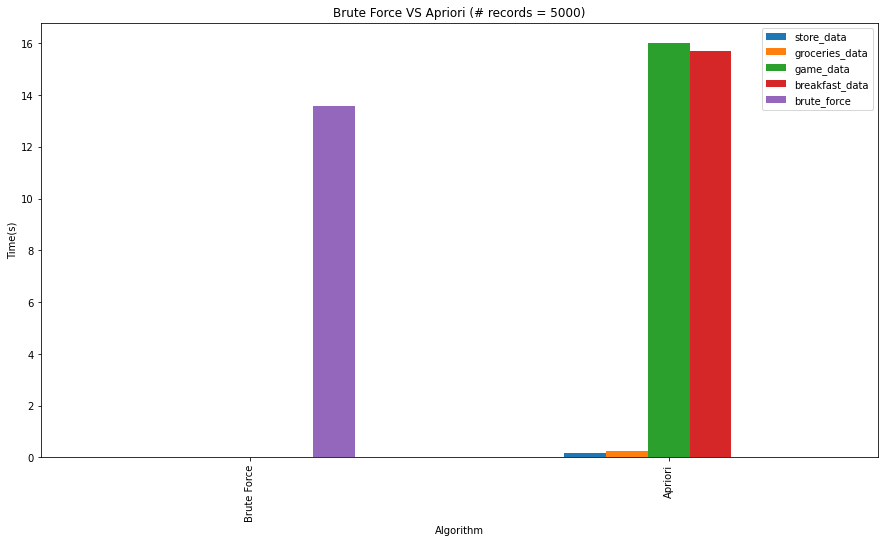

In [27]:
# Compare the estimated time using brute force algorithm on the dataset of same size with the time results of the previous datasets
plotdata = pd.DataFrame({
    "store_data": [0, 0.186],
    "groceries_data": [0, 0.246],
    "game_data": [0, 16],
    "breakfast_data": [0, 15.7],
    "brute_force": [13.57, 0]},
    index=["Brute Force", "Apriori"])
plotdata.plot(kind='bar', figsize=(15, 8))
plt.title("Brute Force VS Apriori (# records = 5000)")

plt.xlabel("Algorithm")

plt.ylabel("Time(s)")

Text(0, 0.5, 'Time(s)')

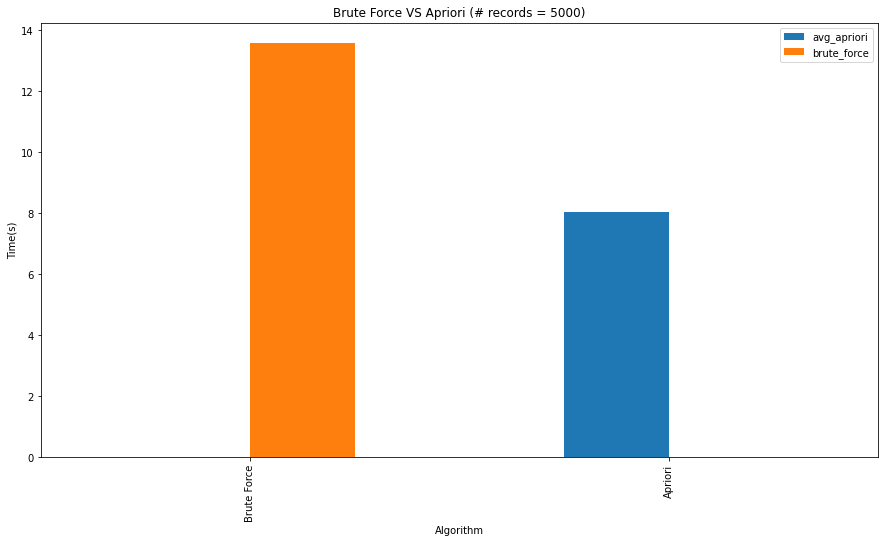

In [28]:
import statistics as st
# Compare the estimated time using brute force algorithm on the dataset of same size with the time results of the previous datasets
plotdata = pd.DataFrame({
    "avg_apriori": [0, st.mean([0.186, 0.246, 16, 15.7])],
    "brute_force": [13.57, 0]},
    index=["Brute Force", "Apriori"])
plotdata.plot(kind='bar', figsize=(15, 8))
plt.title("Brute Force VS Apriori (# records = 5000)")

plt.xlabel("Algorithm")

plt.ylabel("Time(s)")

In [29]:
print(st.mean([0.186, 0.246, 16, 15.7]))

8.033
